In [1]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt

In [54]:
def Technicolor2(src,dst):
    b, g, r = cv2.split(src)
    cv2.addWeighted(b, 0.5, g, 0.5, 0, b)
    cv2.merge((b, b, r), dst)

In [55]:
def Technicolor1(src,dst):
    b, g, r = cv2.split(src)
    cv2.min(b,g,b)
    cv2.min(b,r,b)
    cv2.merge((b, g, r), dst)

In [56]:
def CGAPalette1(src,dst):
    b, g, r = cv2.split(src)
    cv2.max(b,g,b)
    cv2.max(b,r,b)
    cv2.merge((b, g, r), dst)

In [85]:
bgr_image = cv2.imread('biz-group3.jpg')
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

In [86]:
tc1 = bgr_image.copy()
tc2 = bgr_image.copy()
cga = bgr_image.copy()

In [87]:
Technicolor1(tc1,tc1); tc1 = cv2.cvtColor(tc1, cv2.COLOR_BGR2RGB)
Technicolor2(tc2,tc2); tc2 = cv2.cvtColor(tc2, cv2.COLOR_BGR2RGB)
CGAPalette1(cga,cga);  cga = cv2.cvtColor(cga, cv2.COLOR_BGR2RGB)

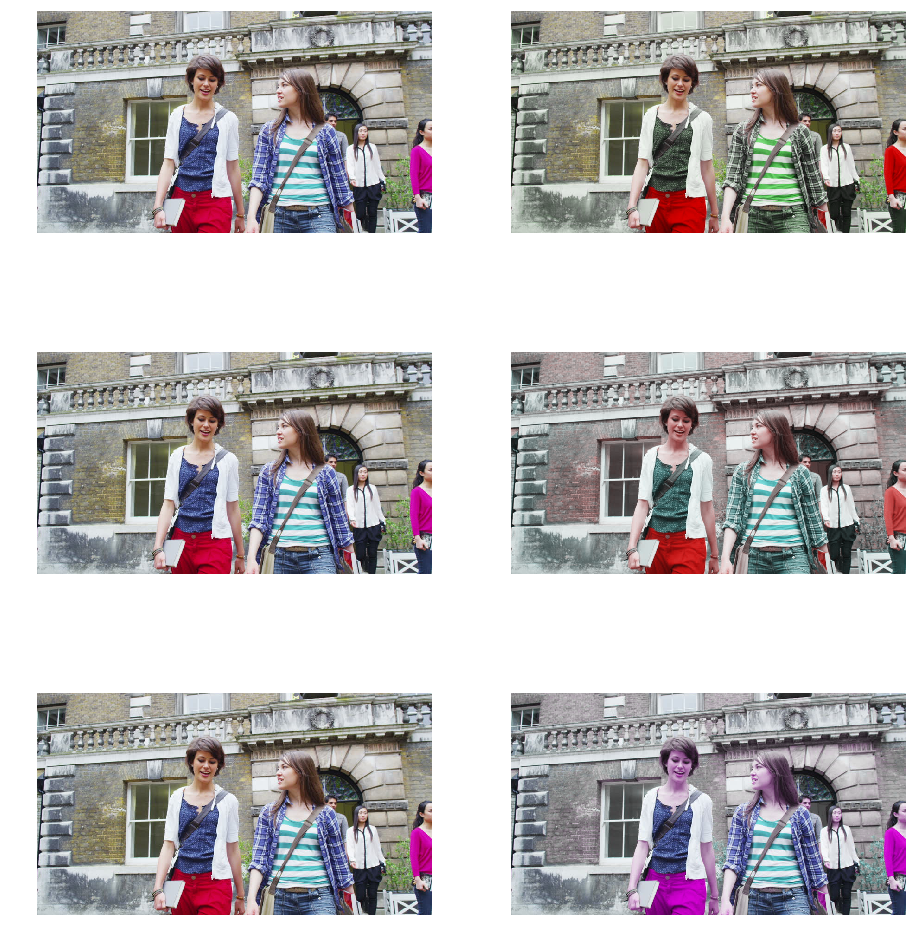

In [88]:
fig,ax = plt.subplots(3,2)
fig.set_size_inches(14.0,16.0); fig.set_dpi(80)
ax[0,0].set_axis_off();ax[0,1].set_axis_off()
ax[1,0].set_axis_off();ax[1,1].set_axis_off()
ax[2,0].set_axis_off();ax[2,1].set_axis_off()
ax[0,0].imshow(rgb_image); ax[0,1].imshow(tc1)
ax[1,0].imshow(rgb_image); ax[1,1].imshow(tc2)
ax[2,0].imshow(rgb_image); ax[2,1].imshow(cga)